# Trabalho Machine Learning

In [1]:
import numpy as np
import pandas as pd

## Load dataset 

In [2]:
sales = pd.read_csv("C:\\Users\\nives\\Desktop\\current semester\\tecnologias data science\\atividades\\video_games\\Video_Games_Sales_as_at_22_Dec_2016.csv", sep=',')

In [3]:
ps4 = pd.read_csv("C:\\Users\\nives\\Desktop\\current semester\\tecnologias data science\\atividades\\video_games\\PS4_GamesSales.csv", encoding = "ISO-8859-1")

In [4]:
xbox = pd.read_csv("C:\\Users\\nives\\Desktop\\current semester\\tecnologias data science\\atividades\\video_games\\XboxOne_GameSales.csv", sep=',', encoding = "ISO-8859-1")

In [5]:
sales.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11739,Mind Quiz: Your Brain Coach,DS,2006.0,Misc,Ubisoft,0.00,0.00,0.08,0.00,0.08,NaN,NaN,NaN,NaN,Ubisoft,E
10996,NHL 2K8,PS3,2007.0,Sports,Take-Two Interactive,0.08,0.01,0.00,0.01,0.09,74.0,24.0,NaN,NaN,Kush Games,E10+
14727,Jack Keane,PC,2008.0,Adventure,Kalypso Media,0.00,0.02,0.00,0.00,0.03,69.0,25.0,7.0,21.0,Legacy Interactive,T
14022,Monster Hunter Frontier Online: Season 9.0,X360,2010.0,Role-Playing,Capcom,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
15990,Yuu Yuu Hakusho DS: Ankoku Bujutsukai Hen,DS,2006.0,Action,Takara Tomy,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
8278,Hitman: HD Trilogy,X360,2013.0,Action,Square Enix,0.07,0.08,0.00,0.02,0.17,69.0,14.0,7.2,45.0,Io Interactive,M
1377,Dead Space,X360,2008.0,Action,Electronic Arts,0.89,0.39,0.00,0.13,1.40,89.0,79.0,8.7,768.0,EA Redwood Shores,M
13043,Ferrari F355 Challenge,PS2,2002.0,Racing,Sony Computer Entertainment,0.03,0.02,0.00,0.01,0.05,70.0,14.0,4.4,5.0,Sega AM2,E
5519,Medal of Honor: Warfighter,PC,2012.0,Action,Electronic Arts,0.14,0.15,0.00,0.04,0.33,55.0,30.0,5.4,599.0,Danger Close,M
15881,Namco Museum 50th Anniversary (JP sales),PS2,2005.0,Misc,Namco Bandai Games,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sales.shape

(16719, 16)

In [7]:
sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

#### Verificando plataformas possiveis

In [8]:
sales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### 1. Como podemos definir agora, entre PS4 e XBox quem teve maior venda na Europa no ano de 2018?

In [9]:
ps4_sales = sales.loc[ sales['Platform'] == 'PS4']
ps4_sales['Platform'].unique()

array(['PS4'], dtype=object)

##### obs: Irei considerar 'XB' , 'X360', 'XOne' como plataforma Xbox

In [10]:
xbox_sales = sales.loc[ (sales['Platform'] == 'XB') | (sales['Platform'] == 'X360') | (sales['Platform'] == 'XOne')]
xbox_sales['Platform'].unique()

array(['X360', 'XB', 'XOne'], dtype=object)

#### Removendo valores null

In [11]:
xbox_sales['Year_of_Release'].isnull().sum()

51

In [12]:
ps4_sales['Year_of_Release'].isnull().sum()

0

In [13]:
xbox_sales.dropna( subset=['Year_of_Release'], inplace=True )
xbox_sales['Year_of_Release'].isnull().sum()

<ipython-input-13-3c167f4c16ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xbox_sales.dropna( subset=['Year_of_Release'], inplace=True )


0

### Arrumando datas que estavam em float

In [14]:
xbox_sales['Year_of_Release'] = xbox_sales['Year_of_Release'].astype(int)
xbox_sales['Year_of_Release'].unique()

<ipython-input-14-84c28950c161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xbox_sales['Year_of_Release'] = xbox_sales['Year_of_Release'].astype(int)


array([2010, 2013, 2011, 2012, 2009, 2007, 2008, 2004, 2015, 2001, 2006,
       2014, 2002, 2016, 2003, 2005, 2000])

In [15]:
ps4_sales['Year_of_Release'] = ps4_sales['Year_of_Release'].astype(int)
ps4_sales['Year_of_Release'].unique()

<ipython-input-15-42edf9d05719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_sales['Year_of_Release'] = ps4_sales['Year_of_Release'].astype(int)


array([2015, 2014, 2016, 2013, 2017])

#### Obs: Como não há venda de 2018 para xbox irei reformular a questão e considerar o ano de 2016, pois a lógica é a mesma

### Selecionado para a data de 2016

In [16]:
ps4_sales_2016 = ps4_sales.loc[(ps4_sales['Year_of_Release'] == 2016)]
ps4_sales_2016

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
94,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5.0,398.0,"EA Sports, EA Vancouver",E
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5.38,93.0,113.0,7.9,7064.0,Naughty Dog,T
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,1.61,2.00,0.15,0.71,4.46,77.0,82.0,3.4,1129.0,Infinity Ward,M
289,Battlefield 1,PS4,2016,Shooter,Electronic Arts,1.10,2.15,0.21,0.61,4.08,88.0,31.0,8.4,809.0,EA DICE,M
325,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.35,1.70,0.15,0.60,3.80,80.0,64.0,7.0,2219.0,Massive Entertainment,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Root Letter,PS4,2016,Adventure,PQube,0.00,0.00,0.01,0.00,0.01,69.0,13.0,7.5,11.0,Kadokawa,NaN
16507,Shin Hayarigami 2,PS4,2016,Adventure,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16530,Dungeons 2,PS4,2016,Role-Playing,Kalypso Media,0.01,0.00,0.00,0.00,0.01,61.0,9.0,7.9,14.0,Kalypso,T
16534,Carmageddon: Max Damage,PS4,2016,Action,Stainless Games,0.01,0.00,0.00,0.00,0.01,51.0,28.0,5.5,39.0,Stainless Games,M


In [17]:
xbox_sales_2016 = xbox_sales.loc[(xbox_sales['Year_of_Release'] == 2016)]
xbox_sales_2016

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
571,FIFA 17,XOne,2016,Sports,Electronic Arts,0.43,2.05,0.0,0.17,2.65,84.0,50.0,5.5,201.0,"EA Sports, EA Vancouver",E
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,Activision,1.46,0.74,0.0,0.22,2.42,78.0,17.0,3.1,290.0,Infinity Ward,M
709,Battlefield 1,XOne,2016,Shooter,Electronic Arts,1.28,0.77,0.0,0.20,2.25,87.0,37.0,8.2,440.0,EA DICE,M
758,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.29,0.68,0.0,0.20,2.16,80.0,33.0,6.9,614.0,Massive Entertainment,M
1439,Gears of War 4,XOne,2016,Shooter,Microsoft Game Studios,0.78,0.44,0.0,0.12,1.35,84.0,96.0,6.2,815.0,The Coalition,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16634,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.0,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E
16647,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.0,0.00,0.01,NaN,NaN,6.6,5.0,Wicked Witch Software,E
16649,ZombiU,XOne,2016,Action,Ubisoft,0.00,0.01,0.0,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16664,Prison Architect,XOne,2016,Action,Introversion Software,0.01,0.00,0.0,0.00,0.01,74.0,13.0,6.7,7.0,"Introversion, Double Eleven",NaN


### Vendas totais na europa de venda 

In [18]:
xbox_total_vendas = xbox_sales_2016['EU_Sales'].sum() 
ps4_total_vendas = ps4_sales_2016['EU_Sales'].sum() 
print('Venda para XBOX: {0}, Venda para PS4: {1}'.format(xbox_total_vendas, ps4_total_vendas))
      
if (xbox_total_vendas > ps4_total_vendas):
    print("Houveram mais vendas de XBOX em 2016 do que para PS4")
else:
    print("Houveram mais vendas de PS4 em 2016 do que para XBOX!")

Venda para XBOX: 10.34, Venda para PS4: 31.78
Houveram mais vendas de PS4 em 2016 do que para XBOX!


## 2. Qual Publisher teve maior venda Global ao decorrer dos anos?

### Agrupando dados por publisher

In [19]:
publisher_sales = sales.groupby(by=["Publisher"]).sum()

### Empresa com maior venda global

In [20]:
publisher_sales = publisher_sales.sort_values(by=['Global_Sales'], ascending = False)
publisher_sales['Global_Sales'].head(1)

Publisher
Nintendo    1788.81
Name: Global_Sales, dtype: float64

## 3- Como fazer o comparativo de notas (Rating) baseado nas Plataformas?

#### Verificando os tipos de Rating existentes

In [21]:
sales['Rating'].isnull().sum()

6769

#### Retirando valores null

In [22]:
sales_rating_dropnan = sales.dropna(subset=['Rating'])
sales_rating_dropnan['Rating'].isnull().sum()

0

#### Agrupando valores por notas

In [23]:
rating_sales= sales_rating_dropnan.groupby(by=["Rating"]).sum()
rating_sales

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Rating,,,,,,,,,,
AO,2005.0,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0
E,7870678.0,1293.26,710.25,198.11,234.19,2436.90,192305.0,55187.0,16749.4,125815.0
E10+,2799083.0,353.32,188.52,40.20,73.56,655.81,74637.0,25279.0,7150.0,83287.0
EC,16070.0,1.53,0.11,0.00,0.11,1.78,0.0,0.0,7.0,4.0
K-A,5990.0,2.56,0.27,1.46,0.03,4.33,92.0,15.0,24.5,150.0
M,3085532.0,748.48,483.97,64.24,177.10,1473.84,106475.0,57636.0,10868.7,731632.0
RP,2011.0,0.00,0.08,0.00,0.01,0.08,186.0,26.0,10.6,32.0
T,5830709.0,759.75,427.03,151.40,155.17,1494.40,181707.0,74703.0,18661.3,280518.0


#### Classificação como funciona: 
* Early Childhood (EC) - Produto destinado para crianças com mais de três anos.
* Crianças a Adultos (K-A) (até 1998): Pode ser inadequado para jogadores menores de 6 anos.
* Everyone (E) - O game contém conteúdo apropriado para maiores de seis anos de idade.
* Everyone 10+ (E10+) - Contém conteúdo considerado impróprio para menores de dez anos de idade. 
* Teen (T) - Contém conteúdo considerado impróprio para os menores de treze anos de idade.
* Mature (M) - Contém conteúdo considerado impróprio para os menores de dezessete anos de idade. 
* Adults Only (AO) - Contém conteúdo considerado impróprio para menores de dezoito anos de idade.
* Rating Pending (RP) - O game ainda não foi completamente classificado.

#### salvando todos os tipos de plataformas:

In [24]:
kind_platform = sales_rating_dropnan['Platform'].unique()
kind_platform

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

#### Agora realizando o comparativo baseando nas plataformas:

In [25]:
platforms_array = []
for platform in kind_platform: #para cada plataforma terei um data set com os valores de vende de cada nota   
    aux = sales_rating_dropnan.loc[sales['Platform'] == platform]
    aux = aux.groupby(by=["Rating"]).sum()
    platforms_array.append(aux['Global_Sales'])
    print(platform , platforms_array, "\n")

Wii [Rating
E       514.42
E10+    162.92
EC        0.67
M        14.13
T       117.91
Name: Global_Sales, dtype: float64] 

DS [Rating
E       514.42
E10+    162.92
EC        0.67
M        14.13
T       117.91
Name: Global_Sales, dtype: float64, Rating
E       434.90
E10+     96.19
EC        0.65
M         2.57
T        28.05
Name: Global_Sales, dtype: float64] 

X360 [Rating
E       514.42
E10+    162.92
EC        0.67
M        14.13
T       117.91
Name: Global_Sales, dtype: float64, Rating
E       434.90
E10+     96.19
EC        0.65
M         2.57
T        28.05
Name: Global_Sales, dtype: float64, Rating
E       181.15
E10+     96.71
M       439.01
T       193.47
Name: Global_Sales, dtype: float64] 

PS3 [Rating
E       514.42
E10+    162.92
EC        0.67
M        14.13
T       117.91
Name: Global_Sales, dtype: float64, Rating
E       434.90
E10+     96.19
EC        0.65
M         2.57
T        28.05
Name: Global_Sales, dtype: float64, Rating
E       181.15
E10+     96.71
M       

Name: Global_Sales, dtype: float64] 



## 4. Como gerar um gráfico das notas de uma plataforma?

In [26]:
import matplotlib.pyplot as plt
import random

### Plotando um gráfico para uma plataforma:

#### Primeiro transformando em pandas dataframe

In [27]:
platforms_data = pd.DataFrame(platforms_array[0])
platforms_data

,Global_Sales
Rating,
E,514.42
E10+,162.92
EC,0.67
M,14.13
T,117.91


#### Agora selecionado os valores para o gráfico do dataframe pandas

In [28]:
y = platforms_data['Global_Sales']
x = platforms_data.index
x, y

(Index(['E', 'E10+', 'EC', 'M', 'T'], dtype='object', name='Rating'),
 Rating
 E       514.42
 E10+    162.92
 EC        0.67
 M        14.13
 T       117.91
 Name: Global_Sales, dtype: float64)

<BarContainer object of 5 artists>

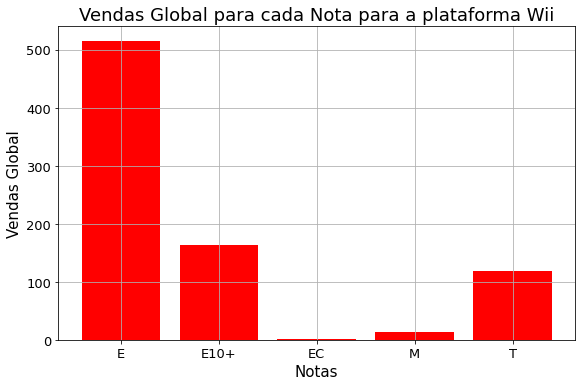

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.tight_layout() 
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.grid(True) #grade 
plt.tight_layout()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Notas', fontsize=15) 
plt.ylabel('Vendas Global', fontsize=15) 
plt.title("Vendas Global para cada Nota para a plataforma "+ kind_platform[0], fontsize= 18)
platforms_data = pd.DataFrame(platforms_array[0])
y = platforms_data['Global_Sales']
x = platforms_data.index
plt.bar(x, y, color='r')

### Mostrando todas as demais plataformas, tendo assim um gráfico para cada plataforma com suas respectivas notas x vendas

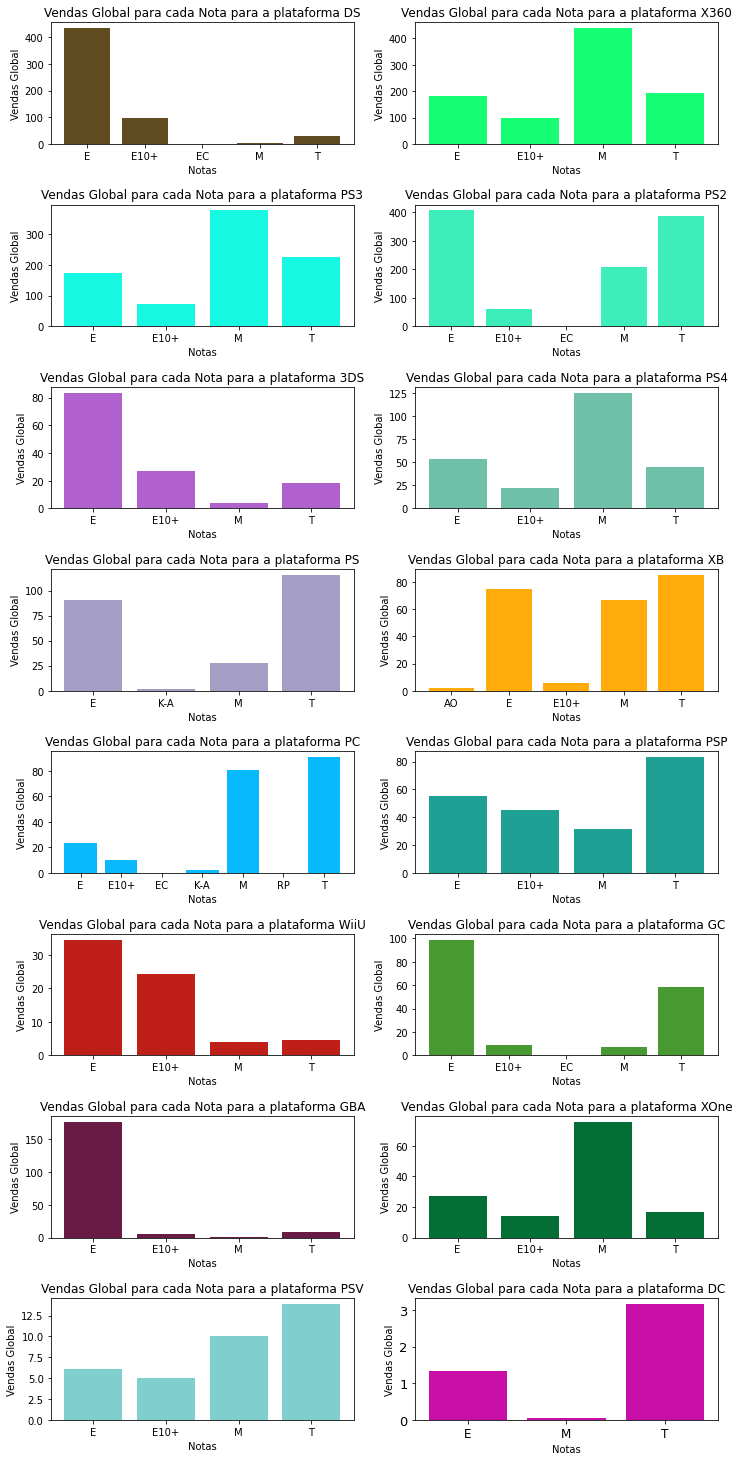

In [35]:
fig, ax = plt.subplots(8,2, figsize=(10, 20))
plt.tight_layout() 
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.subplots_adjust(hspace=0.5, wspace=0.2)
n = 1
for i in range(8):
    for j in range(2):
        platforms_data = pd.DataFrame(platforms_array[n])
        y = platforms_data['Global_Sales']
        x = platforms_data.index
        lengenda= "Vendas Global para cada Nota para a plataforma " + kind_platform[n]
        ax[i,j].bar(x, y, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
        ax[i,j].set_title(lengenda)
        ax[i,j].set(xlabel='Notas', ylabel='Vendas Global')
        n+=1